#Datos de diagnostico de un tumor para la predición de malignidad según caracterisiticas del tumor

In [120]:
#importación de la base de datos
import pandas as pd
df=pd.read_csv("data.csv", ",")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [121]:
#Se elimina una columna vacia
df=df.drop(["Unnamed: 32"], axis=1)

In [122]:
#El tamaño de la base de datos
df.shape

(569, 32)

In [123]:
#Estadistica descriptiva
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


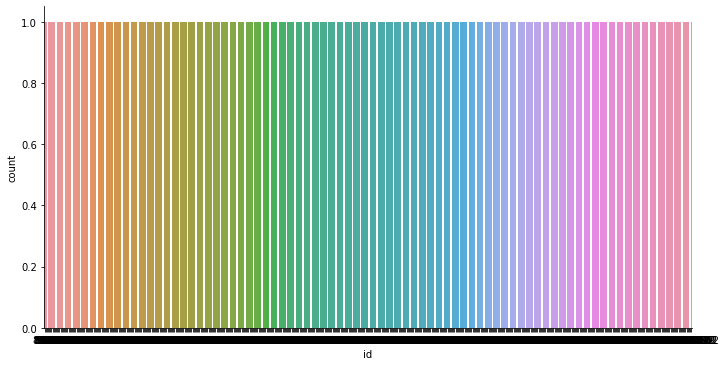

In [124]:
#determinar que no hayan valores repetidos
import seaborn as sb
sb.factorplot('id',data=df,kind="count", aspect=2)

In [125]:
#Como no hay valores repetidos se elimina el id que es meta data
df=df.drop(["id"], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


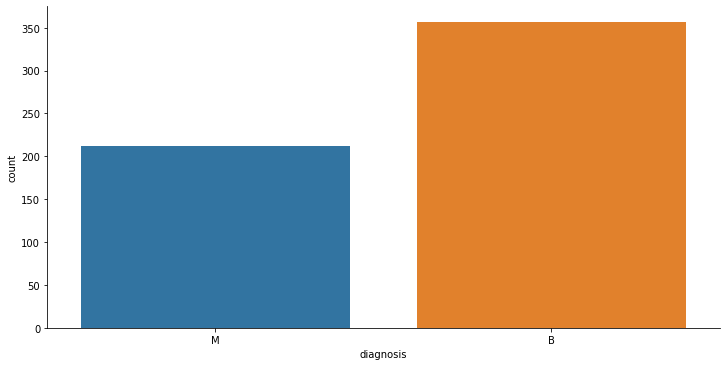

In [126]:
#Histograma de la variable resultado
sb.factorplot('diagnosis',data=df,kind="count", aspect=2)

In [127]:
#Definición de la x
x=df.drop(["diagnosis"], axis=1)

In [128]:
#Definicion de y
y=df["diagnosis"]

In [129]:
#Separa la base de datos, 70% par el entrenamiento 30% para testeo
from sklearn.model_selection import train_test_split
xEntreno, xTest, yEntreno, yTest = train_test_split(x, y, test_size=0.3, random_state=0,shuffle=True)
#xEntreno la matriz de atributos de entrenamiento
#yEntreno la clase de entrenamiento
#xTest la matirz de atributos de testeo
#yTest la clase de testeo

K-Nearest Neighbor

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xEntreno = scaler.fit_transform(xEntreno)
xTest = scaler.transform(xTest)
#Se genera una escala entre 0 y 10 para homogenizar las caracteristicas

In [131]:
from sklearn.neighbors import KNeighborsClassifier
nvecinos=3 #Se toma a priori 3 vecinos
KNN = KNeighborsClassifier(nvecinos)
KNN.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion KNN en el conjunto de entrenamiento: {:.2f}'.format(KNN.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion KNN en conjunto de testeo: {:.2f}'.format(KNN.score(xTest, yTest)))

la precisión de la clasificacion KNN en el conjunto de entrenamiento: 0.98
la precisión de la clasificacion KNN en conjunto de testeo: 0.96


In [132]:
#Predicción
yhat=KNN.predict(xTest)
yhat.size

171

In [133]:
#Probabilidad de yhat
prob=(KNN.predict_proba(xTest))

In [134]:
#Los indicadores de presición
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yTest, yhat))
print(classification_report(yTest, yhat))

[[107   1]
 [  6  57]]
              precision    recall  f1-score   support

           B       0.95      0.99      0.97       108
           M       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



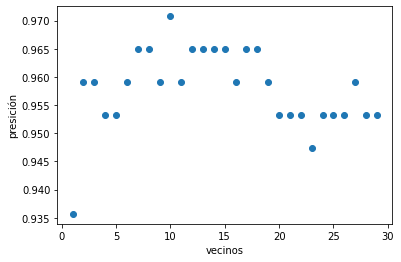

In [135]:
#Relacion entre el numero de vecinos y la presicion
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatche
vecinos=range(1,30)
puntaje=[]
for j in vecinos:
  KNN=KNeighborsClassifier(n_neighbors = j)
  KNN.fit(xEntreno, yEntreno)
  puntaje.append(KNN.score(xTest, yTest))
plt.figure()
plt.xlabel("vecinos")
plt.ylabel("presición")
plt.scatter(vecinos,puntaje)

In [136]:
#Determinar el numero optimo de vecinos
from sklearn.model_selection import GridSearchCV
parametros = {"n_neighbors": range(1, 30)}
gr= GridSearchCV(KNN, parametros)
gr.fit(xEntreno, yEntreno)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=29, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 30)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [137]:
gr.best_params_

{'n_neighbors': 10}

In [138]:
#Se repite el proceso con 10 vecinos
nvecinos=10
KNN2 = KNeighborsClassifier(nvecinos)
KNN2.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion KNN en el conjunto de entrenamiento: {:.2f}'.format(KNN2.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion KNN en conjunto de testeo: {:.2f}'.format(KNN2.score(xTest, yTest)))

la precisión de la clasificacion KNN en el conjunto de entrenamiento: 0.97
la precisión de la clasificacion KNN en conjunto de testeo: 0.97


In [89]:
#Predicción y probabilidae
yhat2=KNN2.predict(xTest)
prob2=(KNN2.predict_proba(xTest))

In [139]:
#Matriz de confusión e indicadores de precision
print(confusion_matrix(yTest, yhat2))
print(classification_report(yTest, yhat2))

[[108   0]
 [  5  58]]
              precision    recall  f1-score   support

           B       0.96      1.00      0.98       108
           M       1.00      0.92      0.96        63

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Como se puede ver la precision en un caso ha mejorado pero la sensibilidad ha mejorado para el otro caso, la relación entre ambas medidas ha mejorado lo que hace pensar que es mejor modelo

In [140]:
KNN3 = KNeighborsClassifier(n_neighbors= 10, weights="distance")
KNN3.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion KNN3 en el conjunto de entrenamiento: {:.2f}'.format(KNN3.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion KNN3 en conjunto de testeo: {:.2f}'.format(KNN3.score(xTest, yTest)))

la precisión de la clasificacion KNN3 en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion KNN3 en conjunto de testeo: 0.96


In [141]:
#Predicción y probabilidae
yhat3=KNN3.predict(xTest)
prob3=(KNN3.predict_proba(xTest))

In [142]:
print(confusion_matrix(yTest, yhat3))
print(classification_report(yTest, yhat3))

[[107   1]
 [  5  58]]
              precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



En general se ve que este modelo se equivoca más que el anterior y en ambos casos por lo tanto se sugiere que el segundo modelo es el mejor hasta ahora

Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
#Se realiza la clasificación con 100 estimaciones
RFC = RandomForestClassifier(n_estimators=100, random_state=0)
RFC.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion RFC en el conjunto de entrenamiento: {:.2f}'.format(RFC.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion RFC en conjunto de testeo: {:.2f}'.format(RFC.score(xTest, yTest)))

la precisión de la clasificacion RFC en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion RFC en conjunto de testeo: 0.96


In [144]:
#predicción
yhat4=RFC.predict(xTest)
yhat4.size

171

In [145]:
#probabilidad
prob4=(RFC.predict_proba(xTest))

In [146]:
#Matriz de confusión e indicadores de precisión
print(confusion_matrix(yTest, yhat4))
print(classification_report(yTest, yhat4))

[[104   4]
 [  3  60]]
              precision    recall  f1-score   support

           B       0.97      0.96      0.97       108
           M       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Aunque este modelo tien más errores que el mode KNN2, se ve que es más balanceado en la predición de las categorias

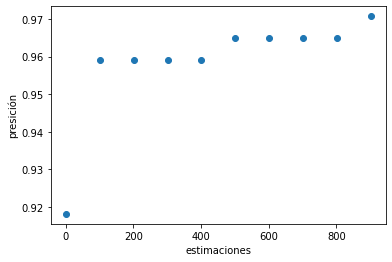

In [147]:
#Relacion entre la precisión y el numero de estimaciones
nestimaciones=range(1,1000,100)
puntajeRFC=[]
for j in nestimaciones:
  RFC=RandomForestClassifier(n_estimators=j,random_state=0)
  RFC.fit(xEntreno, yEntreno)
  puntajeRFC.append(RFC.score(xTest, yTest))
plt.figure()
plt.xlabel("estimaciones")
plt.ylabel("presición")
plt.scatter(nestimaciones,puntajeRFC)

In [151]:
#Se realiza la clasificación con 801 estimaciones según la grafica
RFC2 = RandomForestClassifier(n_estimators=801, random_state=0)
RFC2.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion RFC2 en el conjunto de entrenamiento: {:.2f}'.format(RFC2.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion RFC2 en conjunto de testeo: {:.2f}'.format(RFC2.score(xTest, yTest)))

la precisión de la clasificacion RFC2 en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion RFC2 en conjunto de testeo: 0.96


In [113]:
yhat5=RFC2.predict(xTest)
prob5=(RFC3.predict_proba(xTest))

In [107]:
print(confusion_matrix(yTest, yhat5))
print(classification_report(yTest, yhat5))

[[104   4]
 [  2  61]]
              precision    recall  f1-score   support

           B       0.98      0.96      0.97       108
           M       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



Se ve que este modelo tiene menos errores que el anterior y hace una predición más balanceada que el KNN2

In [155]:
#Se realiza la clasificación con 801 estimaciones, pero se cambia el creterio de división de los casos en vez de hacer el gini que es una medida de desigualdad se toma la entropia como medida de información ganada
RFC3 = RandomForestClassifier(n_estimators=801, random_state=0,criterion="entropy")
RFC3.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion RFC3 en el conjunto de entrenamiento: {:.2f}'.format(RFC3.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion RFC3 en conjunto de testeo: {:.2f}'.format(RFC3.score(xTest, yTest)))

la precisión de la clasificacion RFC3 en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion RFC3 en conjunto de testeo: 0.97


In [156]:
yhat6=RFC3.predict(xTest)
prob6=(RFC3.predict_proba(xTest))

In [157]:
print(confusion_matrix(yTest, yhat6))
print(classification_report(yTest, yhat6))

[[105   3]
 [  2  61]]
              precision    recall  f1-score   support

           B       0.98      0.97      0.98       108
           M       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



En general se puede decir que este modelo es tan bueno como KNN2, pero predicción es más balanceada, lo que lo hace mejor